In [1]:
import torch as th
import numpy as np
import pandas as pd

FILE_NAME = 'D:\\steini\\chess\\lczero-training\\intermediate_layer_results.csv'
OUTPUT_FILE_NAME = 'outputs\\a0sf_apply_policy_map_umap_embedding'

In [2]:
df = pd.read_csv(FILE_NAME)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857
0,0,-0.474992,-0.139022,0.131070,0.027810,-0.058364,-0.067046,-0.035261,-0.722953,-0.055442,...,-0.167993,0.136900,0.083806,0.038269,0.129002,0.086814,0.035539,0.026323,-0.041040,-0.097572
1,1,-1.122249,-0.650508,-0.193047,-0.317692,-0.210646,-0.454885,-0.286882,-1.345873,-0.584344,...,-0.228835,0.207688,0.135577,0.061458,0.196335,0.134414,0.057880,0.062522,-0.031784,-0.103833
2,2,-0.866739,-0.381561,-0.112729,-0.150719,-0.237290,-0.386530,-0.141612,-1.235470,-0.335443,...,-0.075309,0.167550,0.109661,0.047285,0.137523,0.094631,0.042086,0.025791,-0.035198,-0.074677
3,3,-0.916328,-0.306744,-0.287251,-0.496871,-0.235733,-0.379395,-0.339777,-1.460892,-0.575669,...,-0.053132,0.141582,0.088435,0.037331,0.120124,0.077339,0.033345,0.029714,-0.032441,-0.089465
4,4,-1.018312,-0.456331,-0.240799,-0.422853,-0.248458,-0.574684,-0.261247,-1.351149,-0.322932,...,-0.065019,0.111584,0.076940,0.035724,0.099709,0.073204,0.034608,-0.024971,-0.042793,-0.049516


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Columns: 1859 entries, Unnamed: 0 to 1857
dtypes: float64(1858), int64(1)
memory usage: 405.3 MB


In [4]:
loaded_x = th.tensor(df.values[:,1:])

print(loaded_x)
print(loaded_x.shape)

tensor([[-0.4750, -0.1390,  0.1311,  ...,  0.0263, -0.0410, -0.0976],
        [-1.1222, -0.6505, -0.1930,  ...,  0.0625, -0.0318, -0.1038],
        [-0.8667, -0.3816, -0.1127,  ...,  0.0258, -0.0352, -0.0747],
        ...,
        [-1.0333, -0.8319, -0.7606,  ..., -0.8834, -1.8543, -2.9019],
        [-0.3597, -0.8115, -0.1254,  ..., -0.1673, -0.1813, -0.1848],
        [-0.8727, -0.5872, -0.4148,  ...,  2.0177,  0.4963,  0.0512]],
       dtype=torch.float64)
torch.Size([28575, 1858])


In [5]:
import umap.umap_ as umap
from matplotlib import pyplot as plt

In [6]:
def run_umap(path, learning_rate, nn, n_epochs, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=nn, learning_rate=learning_rate, n_epochs=n_epochs, min_dist=min_dist)
    
    path = path+'_nn'+str(nn)+'_lr'+str(learning_rate)+'_nepochs'+str(n_epochs)+'_mindist'+str(min_dist)+'.csv'
    image_file_name = path+'_nn'+str(nn)+'_lr'+str(learning_rate)+'_nepochs'+str(n_epochs)+'_mindist'+str(min_dist)+'.png'
    
    final_data = loaded_x
    umap_embedding = reducer.fit_transform(final_data)
    
    umap_df = pd.DataFrame(umap_embedding)
    umap_df.to_csv(path)
    
    plt.figure()
    plt.scatter(umap_embedding[:,0],umap_embedding[:,1])
    print('storing to', path)
    plt.savefig(image_file_name)

c:\users\steini\miniconda3\envs\chess\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\steini\miniconda3\envs\chess\lib\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


storing to outputs\a0sf_apply_policy_map_umap_embedding_nn5_lr1.0_nepochs50_mindist0.1.csv


c:\users\steini\miniconda3\envs\chess\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


storing to outputs\a0sf_apply_policy_map_umap_embedding_nn5_lr1.0_nepochs200_mindist0.1.csv


c:\users\steini\miniconda3\envs\chess\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


storing to outputs\a0sf_apply_policy_map_umap_embedding_nn5_lr1.0_nepochs500_mindist0.1.csv


c:\users\steini\miniconda3\envs\chess\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


storing to outputs\a0sf_apply_policy_map_umap_embedding_nn5_lr1.0_nepochs1000_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn15_lr1.0_nepochs50_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn15_lr1.0_nepochs200_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn15_lr1.0_nepochs500_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn15_lr1.0_nepochs1000_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn30_lr1.0_nepochs50_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn30_lr1.0_nepochs200_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn30_lr1.0_nepochs500_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn30_lr1.0_nepochs1000_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn50_lr1.0_nepochs50_mindist0.1.csv
storing to outputs\a0sf_apply_policy_map_umap_embedding_nn50_lr1.0_nepo

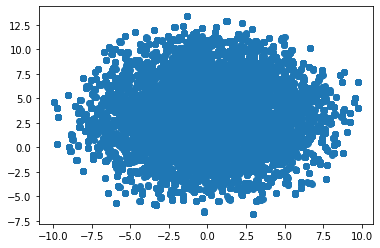

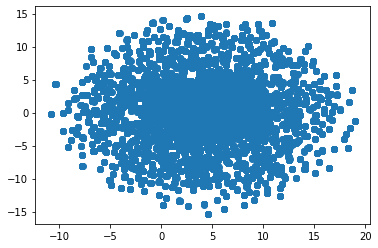

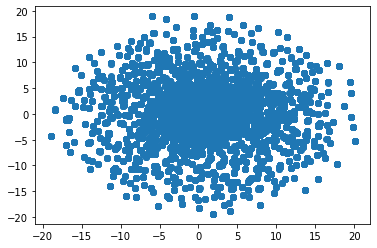

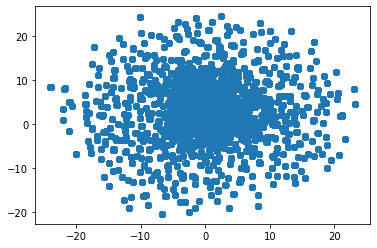

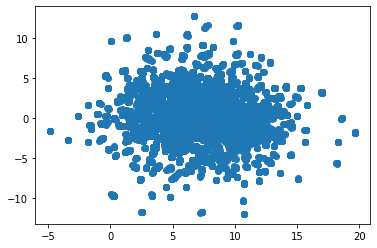

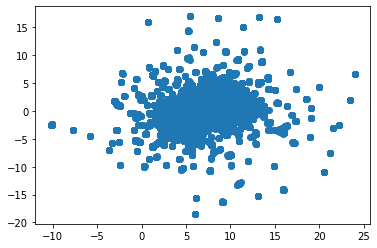

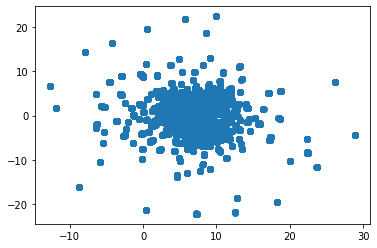

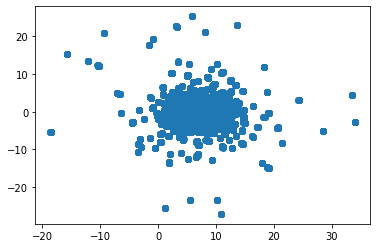

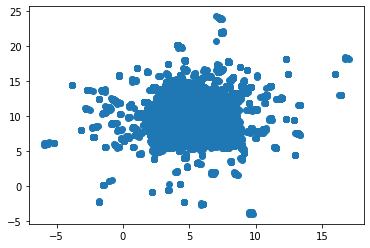

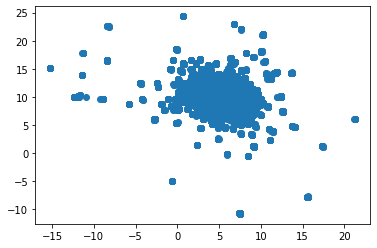

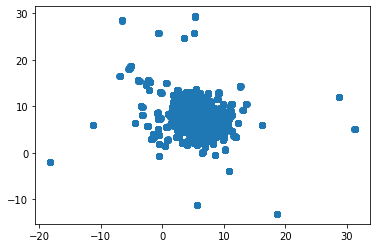

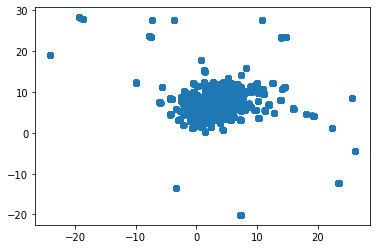

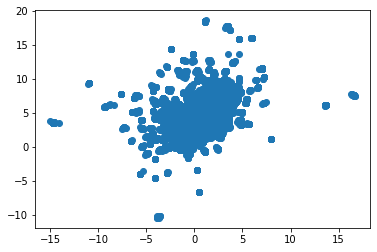

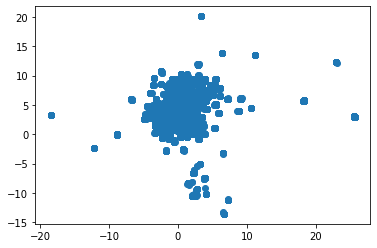

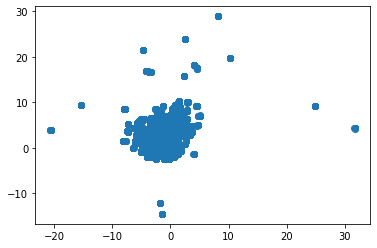

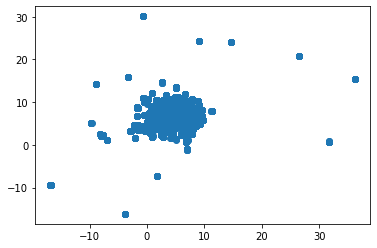

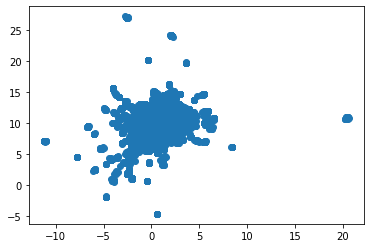

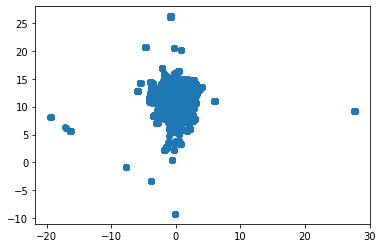

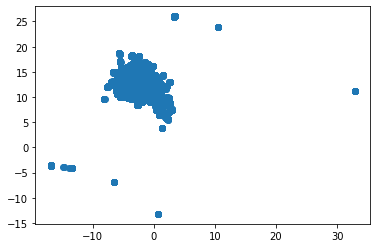

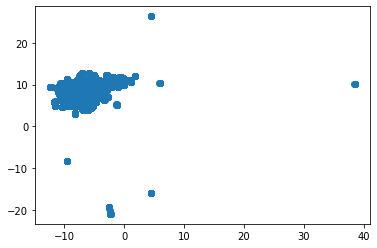

In [7]:
nns = [5,15,30,50,100]
n_epochs_settings = [50, 200, 500, 1000]
min_dist = [0.1]
learning_rate = [1.0]
for nn in nns:
    for n_epochs in n_epochs_settings:
        for md in min_dist:
            for lr in learning_rate:
                run_umap(path=OUTPUT_FILE_NAME, learning_rate=lr, nn=nn, n_epochs=n_epochs, min_dist=md)